In [1]:
import bikescience.sp_grid as gr
from bikescience.slope import plot_slope, plot_slopes, split_route

import folium
import pandas as pd
import geopandas as gpd
from statistics import stdev
from ipywidgets import interact_manual, widgets, fixed
from IPython.core.display import display, HTML, clear_output
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import warnings
import requests
import os
warnings.simplefilter('ignore')
import time

zone_shp = gpd.read_file('../data/sao-paulo/od/shapes/Zonas_2017_region.shp')
zone_shp.crs = {'init': 'epsg:31983'}  
zone_shp.to_crs(epsg='4326', inplace=True)

#od_routes = pd.read_csv('../data/sao-paulo/od/routes.csv')
od_routes_sp = gpd.read_file('../data/sao-paulo/od/routes/bike_routes_in_sp.shp')
od_routes_sp.crs = {'init': 'epsg:4326'}

#od_routes_all = gpd.read_file('../data/sao-paulo/od/routes/bike_routes_all.shp')
#od_routes_all.crs = {'init': 'epsg:4326'}

od_routes_sp['length'] = od_routes_sp['geometry'].length
#display(od_routes_sp.sort_values('length').tail(5))

route_stretchs_size = 500 #meters

/home/pedro/.local/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


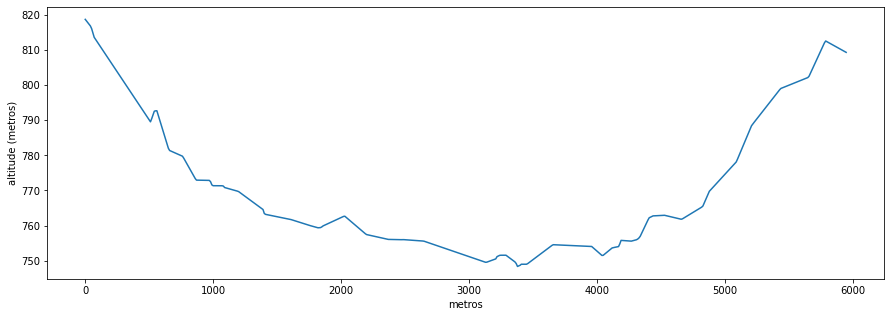

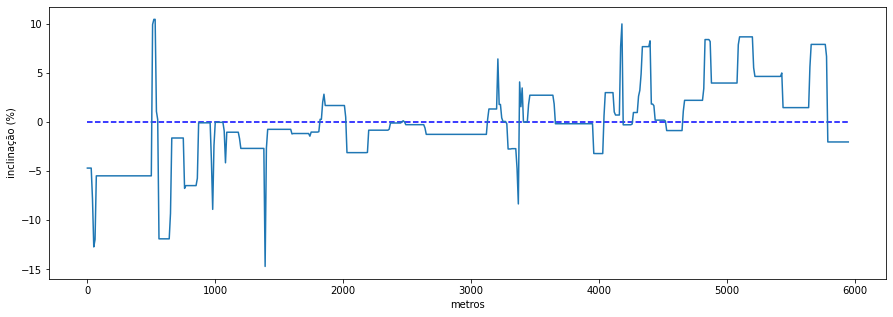

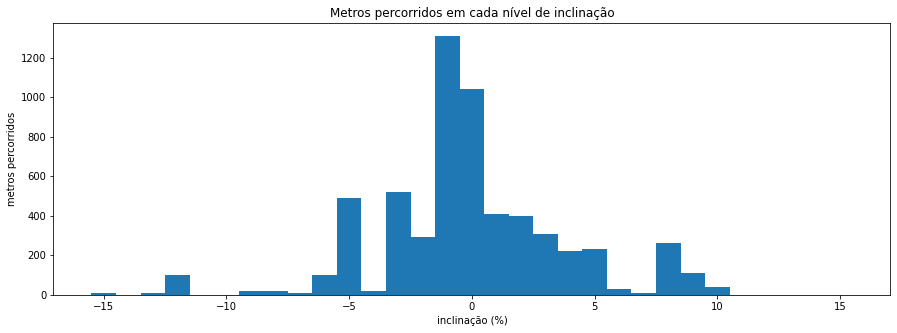

In [12]:
fmap = gr.map_around_sp(the_grid=None,zoom=11,plot_grid=False)
plot_slope (fmap, od_routes_sp.iloc[211], 'line', absolute=False)
display(fmap)

split_size = 10
r_ex = od_routes_sp.iloc[211] #968
r_ex_split = split_route(r_ex, split_size)

heights = [line[0].coords[0][2] for line in r_ex_split]
slopes = [line[1] for line in r_ex_split]
lengths = [i * split_size for i in range(len(heights))]

plt.figure(figsize=(15,5))
plt.plot(lengths, heights, label='altitude')
plt.ylabel('altitude (metros)')
plt.xlabel('metros')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(lengths, [0]*len(lengths), 'b--', label='0')
plt.plot(lengths, slopes, label='distância')
plt.ylabel('inclinação (%)')
plt.xlabel('metros')
plt.show()

plt.figure(figsize=(15,5))
plt.hist(bins= [i + .5 for i in range(-16, 16)],x=[round(s) for s in slopes], weights = [split_size]*len(slopes))
plt.title('Metros percorridos em cada nível de inclinação')
plt.xlabel('inclinação (%)')
plt.ylabel('metros percorridos')
plt.show()

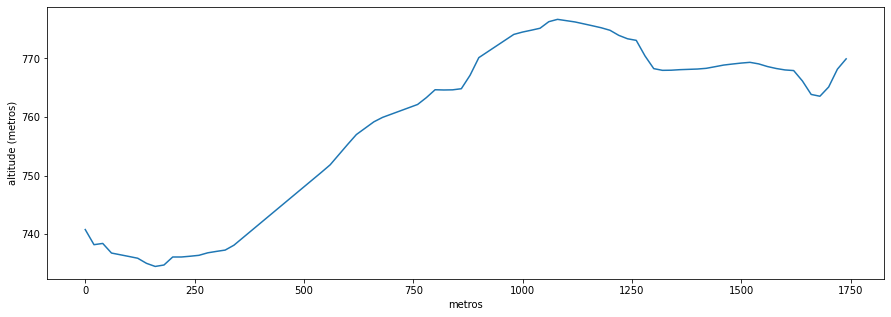

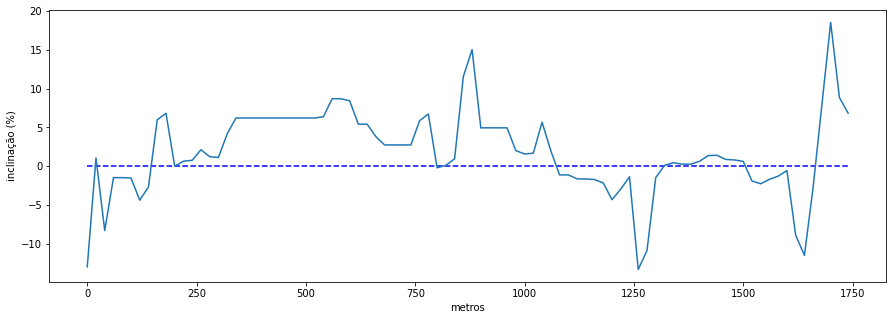

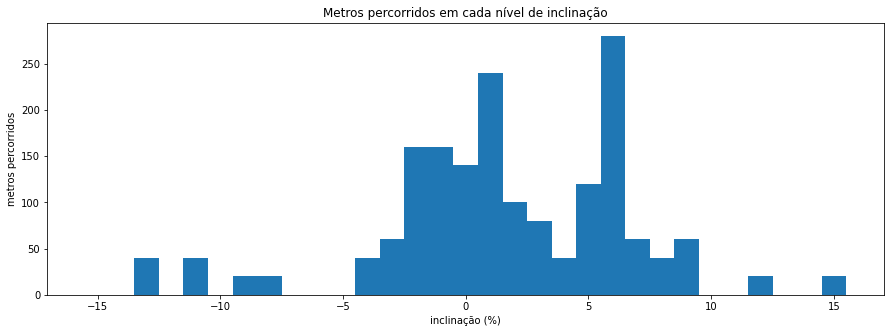

In [16]:
fmap = gr.map_around_sp(the_grid=None,zoom=11,plot_grid=False)
plot_slope (fmap, od_routes_sp.iloc[700], 20, absolute=False)
display(fmap)

split_size = 20
r_ex = od_routes_sp.iloc[700] #968
r_ex_split = split_route(r_ex, split_size)

heights = [line[0].coords[0][2] for line in r_ex_split]
slopes = [line[1] for line in r_ex_split]
lengths = [i * split_size for i in range(len(heights))]

plt.figure(figsize=(15,5))
plt.plot(lengths, heights, label='altitude')
plt.ylabel('altitude (metros)')
plt.xlabel('metros')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(lengths, [0]*len(lengths), 'b--', label='0')
plt.plot(lengths, slopes, label='distância')
plt.ylabel('inclinação (%)')
plt.xlabel('metros')
plt.show()

plt.figure(figsize=(15,5))
plt.hist(bins= [i + .5 for i in range(-16, 16)],x=[round(s) for s in slopes], weights = [split_size]*len(slopes))
plt.title('Metros percorridos em cada nível de inclinação')
plt.xlabel('inclinação (%)')
plt.ylabel('metros percorridos')
plt.show()

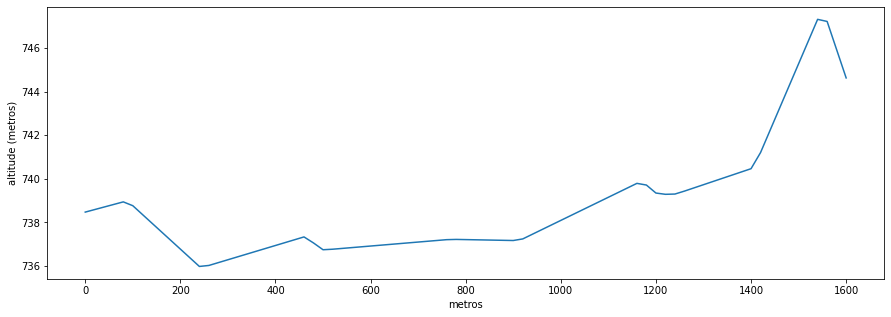

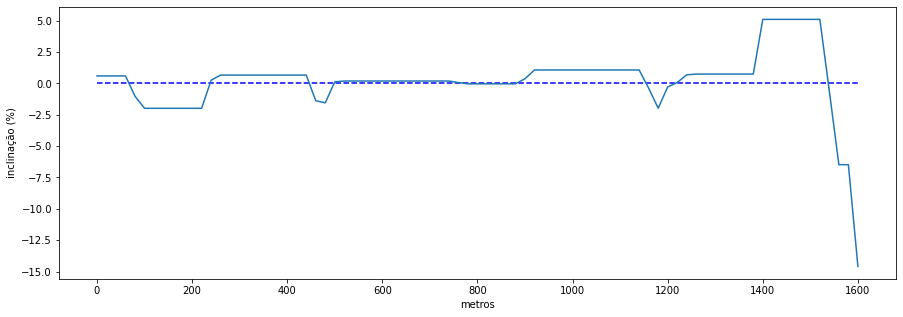

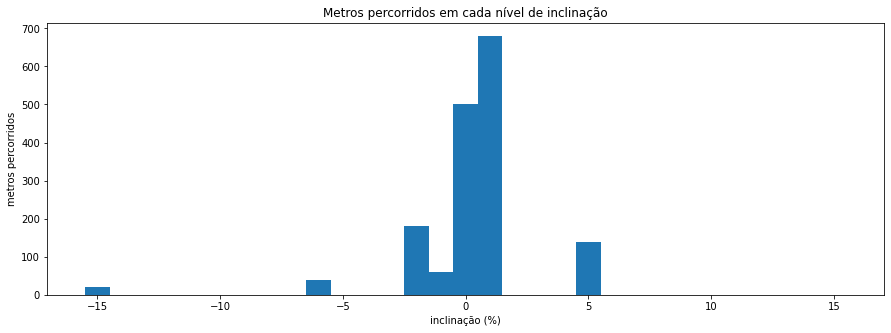

In [17]:
fmap = gr.map_around_sp(the_grid=None,zoom=11,plot_grid=False)
plot_slope (fmap, od_routes_sp.iloc[800], 20, absolute=False)
display(fmap)

split_size = 20
r_ex = od_routes_sp.iloc[800] #968
r_ex_split = split_route(r_ex, split_size)

heights = [line[0].coords[0][2] for line in r_ex_split]
slopes = [line[1] for line in r_ex_split]
lengths = [i * split_size for i in range(len(heights))]

plt.figure(figsize=(15,5))
plt.plot(lengths, heights, label='altitude')
plt.ylabel('altitude (metros)')
plt.xlabel('metros')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(lengths, [0]*len(lengths), 'b--', label='0')
plt.plot(lengths, slopes, label='distância')
plt.ylabel('inclinação (%)')
plt.xlabel('metros')
plt.show()

plt.figure(figsize=(15,5))
plt.hist(bins= [i + .5 for i in range(-16, 16)],x=[round(s) for s in slopes], weights = [split_size]*len(slopes))
plt.title('Metros percorridos em cada nível de inclinação')
plt.xlabel('inclinação (%)')
plt.ylabel('metros percorridos')
plt.show()